**Analyzing Stock data of Tesla, Ford and General Motors and drawing out a comparative study. The timestamp of data ranges from Jan 1 2012 to Jan 1 2017. Data is taken from Google API through pandas datareader. **

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas_datareader
import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [8]:
tesla = web.DataReader('TSLA','google',start,end)

In [9]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [10]:
ford = web.DataReader('F','google',start,end)
gm = web.DataReader('GM','google',start,end)

In [11]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [12]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


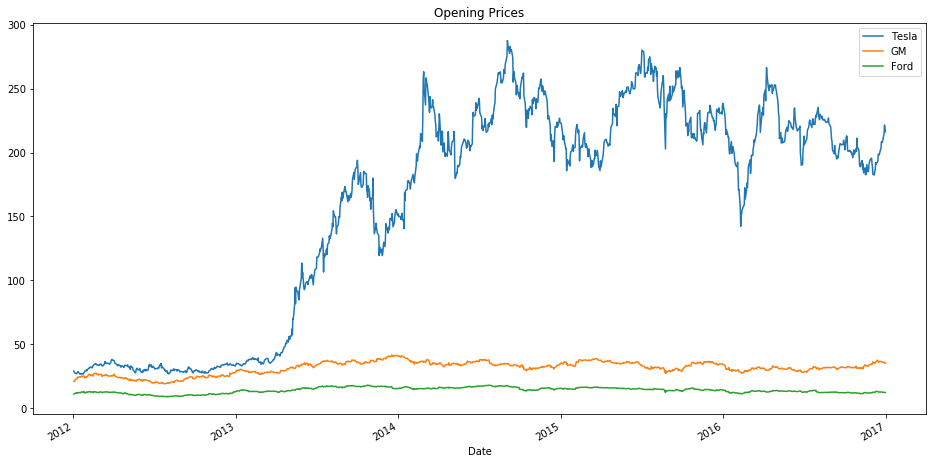

In [13]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

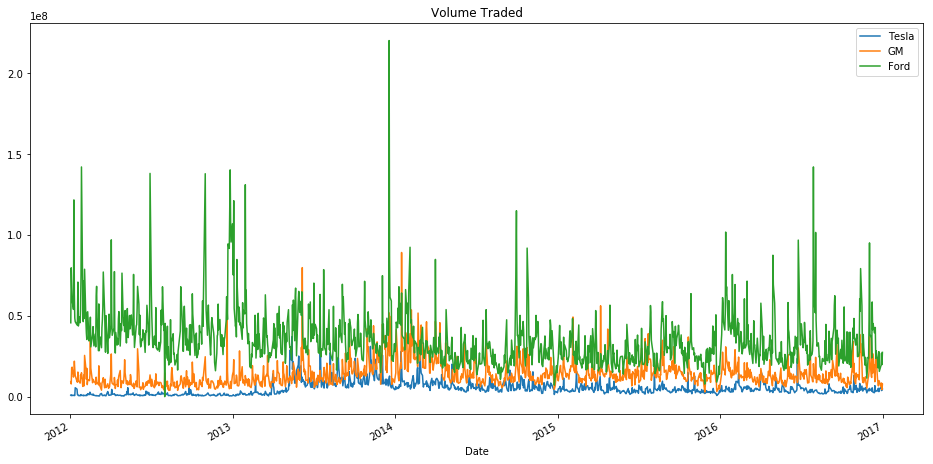

In [14]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [15]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

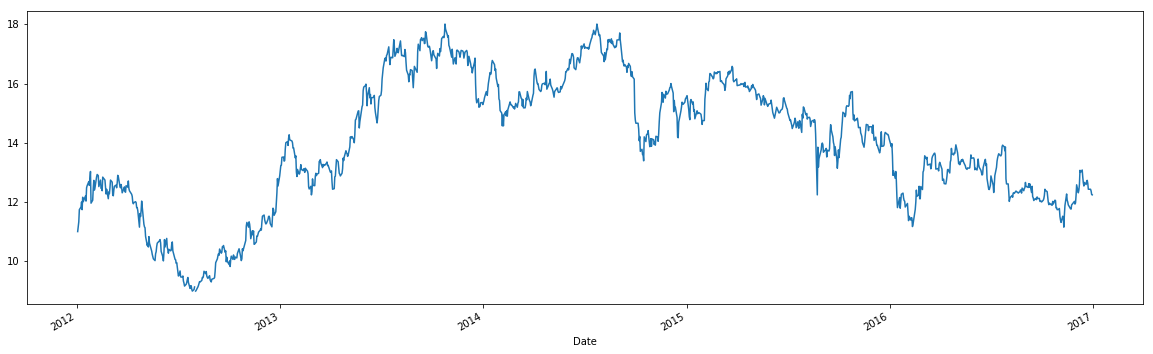

In [16]:
ford['Open'].plot(figsize=(20,6))

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multiply the Volume column by the Open price. This still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

In [17]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

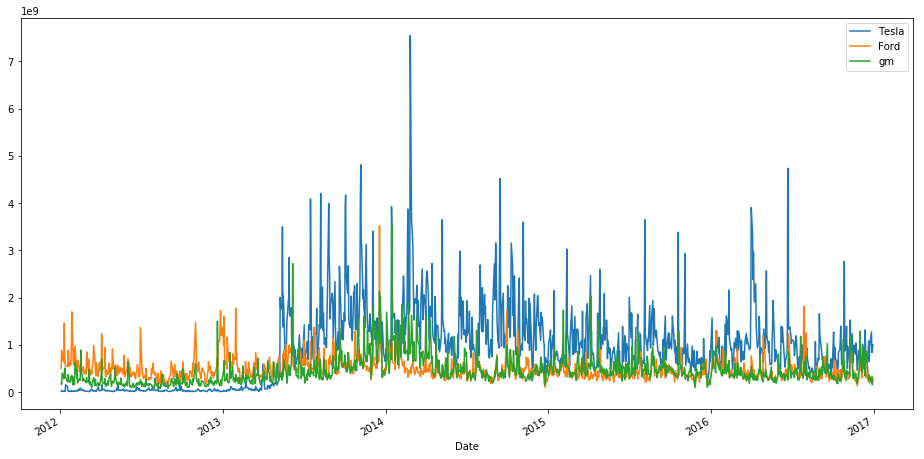

In [18]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='gm')
plt.legend();

In [19]:
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

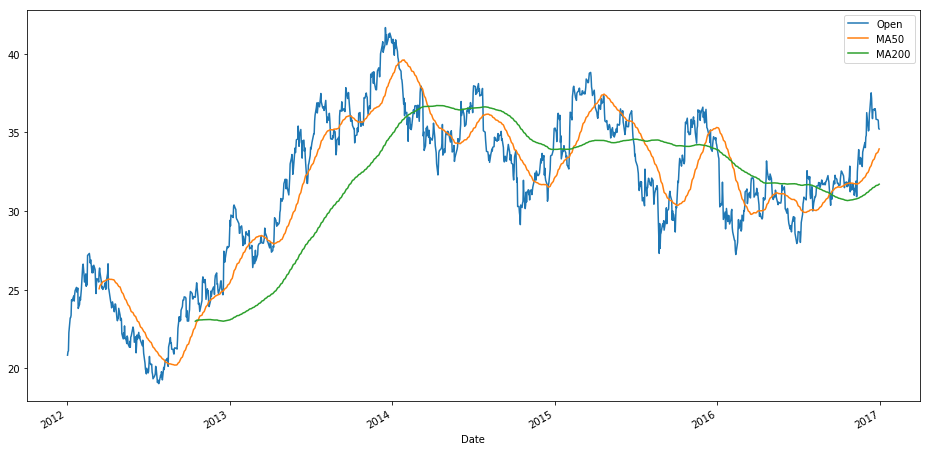

In [20]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

In [21]:
from pandas.plotting import scatter_matrix

In [22]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [23]:
car_comp.columns = ['Tesla Opens','GM Opens','Ford Open']

In [24]:
car_comp.head()

,Tesla Opens,GM Opens,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


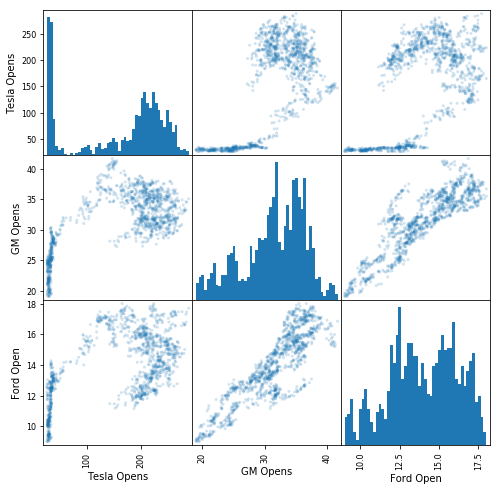

In [49]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

**Below is the visualization in form of CandleStick chart for Ford in January 2012. (Too many dates wont look good for a candlestick chart)** 

In [26]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [27]:
ford_reset = ford.loc['2012-01'].reset_index()

In [28]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date            20 non-null datetime64[ns]
Open            20 non-null float64
High            20 non-null float64
Low             20 non-null float64
Close           20 non-null float64
Volume          20 non-null int64
Total Traded    20 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 KB


In [29]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [30]:
ford_reset.head()

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,734505.0
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,734506.0
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,734507.0
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,734508.0
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,734511.0


In [31]:
list_of_cols = ['date_ax','Open','High','Low','Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values ]

In [32]:
ford_values

[(734505.0, 11.0, 11.25, 10.99, 11.13),
 (734506.0, 11.15, 11.53, 11.07, 11.3),
 (734507.0, 11.33, 11.63, 11.24, 11.59),
 (734508.0, 11.74, 11.8, 11.52, 11.71),
 (734511.0, 11.83, 11.95, 11.7, 11.8),
 (734512.0, 12.0, 12.05, 11.63, 11.8),
 (734513.0, 11.74, 12.18, 11.65, 12.07),
 (734514.0, 12.16, 12.18, 11.89, 12.14),
 (734515.0, 12.01, 12.08, 11.84, 12.04),
 (734519.0, 12.2, 12.26, 11.96, 12.02),
 (734520.0, 12.03, 12.37, 12.0, 12.34),
 (734521.0, 12.48, 12.72, 12.43, 12.61),
 (734522.0, 12.55, 12.64, 12.45, 12.59),
 (734525.0, 12.69, 12.84, 12.55, 12.66),
 (734526.0, 12.56, 12.86, 12.46, 12.82),
 (734527.0, 12.8, 12.98, 12.7, 12.93),
 (734528.0, 13.03, 13.05, 12.66, 12.79),
 (734529.0, 11.96, 12.53, 11.79, 12.21),
 (734532.0, 12.06, 12.44, 12.0, 12.29),
 (734533.0, 12.47, 12.51, 12.2, 12.42)]

In [33]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

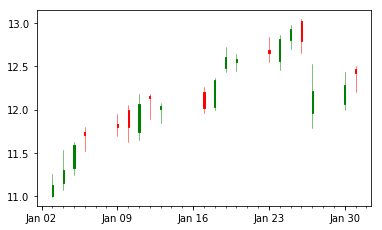

In [50]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,ford_values,width=0.1, colorup='g',colordown='r');

Below are some key financial calculations:
**Daily Percentage Change:**
$ r_t = \frac{p_t}{p_{t-1}} -1$
This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next.

In [35]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [36]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [37]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

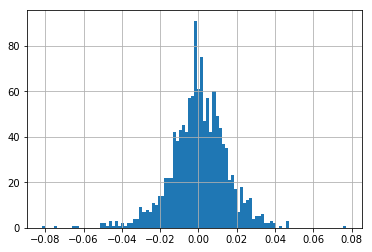

In [38]:
ford['returns'].hist(bins=100)

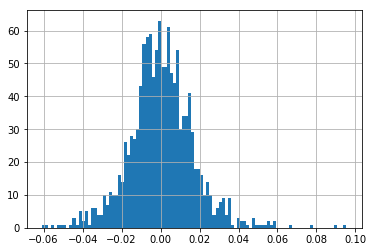

In [39]:
gm['returns'].hist(bins=100)

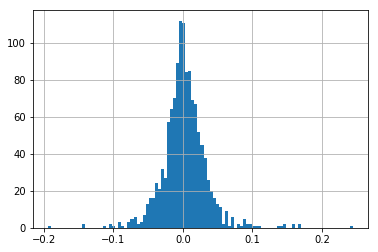

In [40]:
tesla['returns'].hist(bins=100)

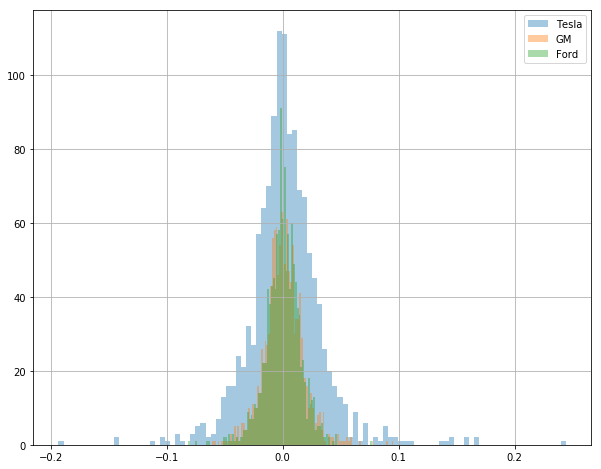

In [41]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4)
gm['returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=100,label='Ford',figsize=(10,8),alpha=0.4)
plt.legend()

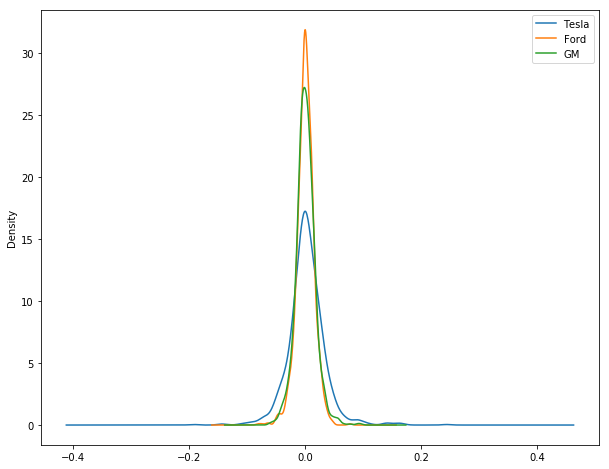

In [42]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(10,8))
plt.legend()

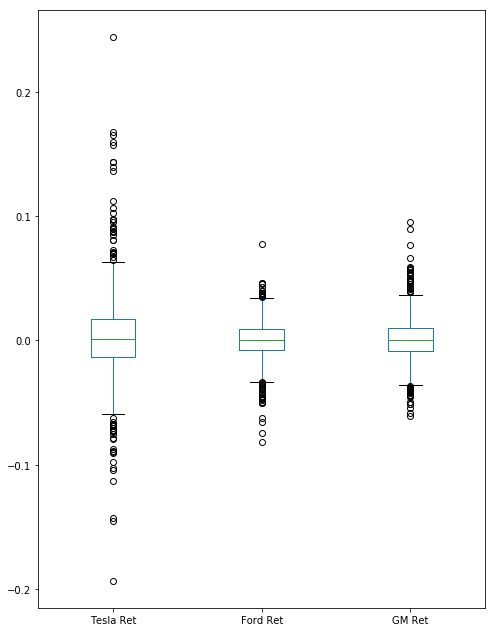

In [51]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Ret','Ford Ret','GM Ret']
box_df.plot(kind='box',figsize=(8,11))

**Comparing Daily Returns between Stocks:
A scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are.**

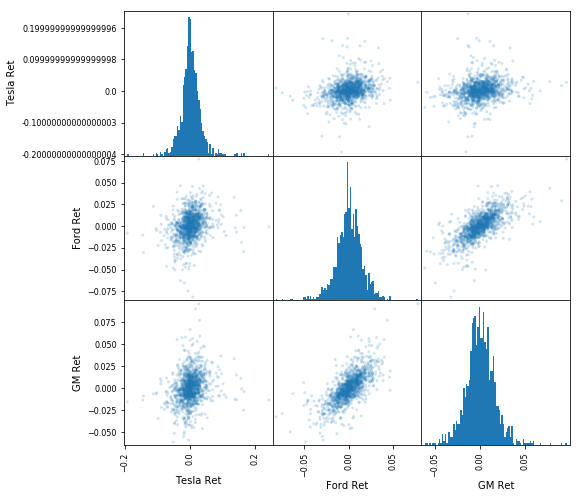

In [44]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

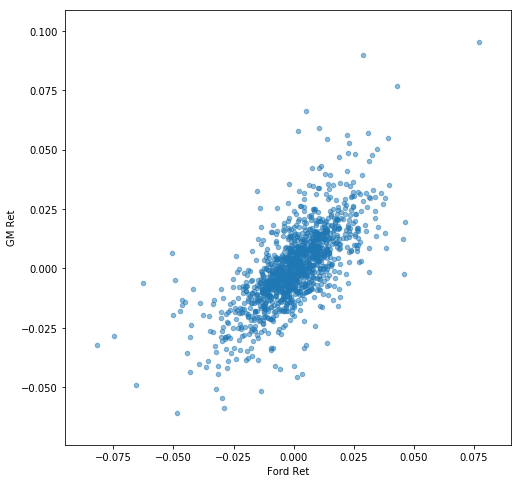

In [52]:
box_df.plot(kind='scatter',x='Ford Ret',y='GM Ret',alpha=0.5,figsize=(8,8)) 

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss.

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [46]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [47]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

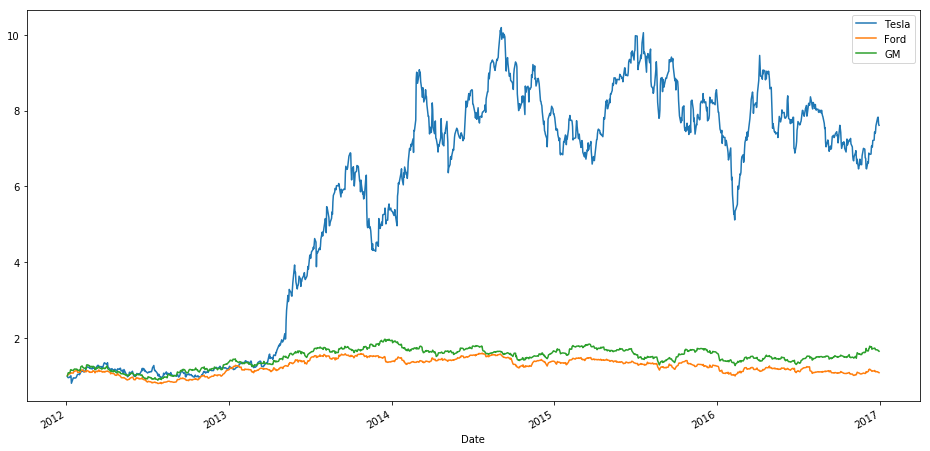

In [48]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()